In [1]:
import numpy as np
from random import gauss
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# generate an array with npts,maxval,minval
def arrgen(npts,maxval,minval):
    a = np.zeros(npts)
    constant = (maxval-minval)/(npts-1)
    for i in range(npts):
        a[i]= minval + i*constant
    return(a)

In [3]:
# modeling biphasic response of ganglion cell
# This is an off cell
# with a = 20/16.5 b = 0.3 c = 0.008 and t in msec
# k_t will be zero after 30 msec

def k_t(a,b,c,t):
    if t>0:
        return -a*np.sin(b*t)*np.exp(-c*t*t)
    else:
        return 0.0

In [4]:
# square pulse stimulation
def s_d(x,t,width,speed,x0):
    val = speed*t + x0 # position of leading edge
    if x > val-width and x < val:
        return 1.0
    else:
        return 0.0

In [5]:
# use of two Gussians (one inverted) to approx the receptive field
# or spatial filter
# parameters are chosen to have min at +1 and -1

def k_x(x):
    rc = 0.5
    rs = 0.65
    
    kc = 1.3
    
    ks = 0.9
    
    a = x*x/2/rc/rc
    b = x*x/2/rs/rs
    return kc*np.exp(-a) - ks*np.exp(-b)

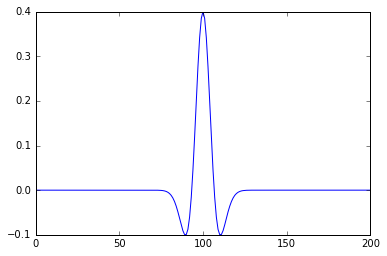

In [6]:
# generate x with arrgen

xnpts = 201
xmax = 10
xmin = -10
x = arrgen(xnpts,xmax,xmin)

kx_len = xnpts  #m
kt_len = 30  #n

fx = np.zeros(kx_len)
ft = np.zeros(kt_len)

for i in range(kx_len):
    fx[i] = k_x(x[i])
plt.plot(fx)

0


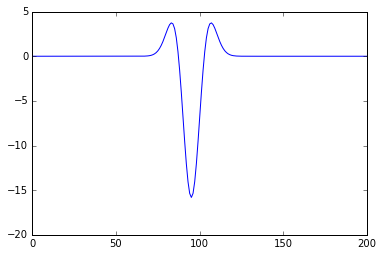

1


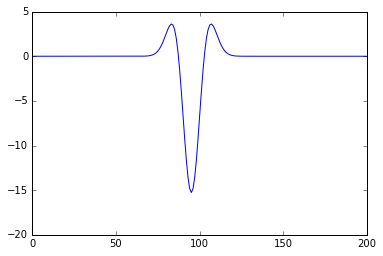

2


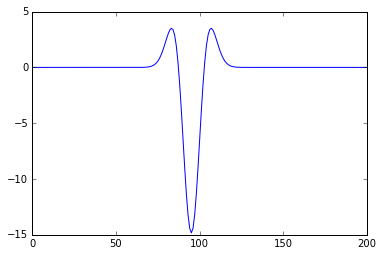

3


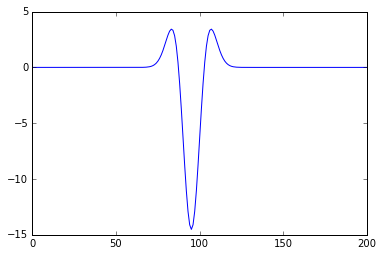

4


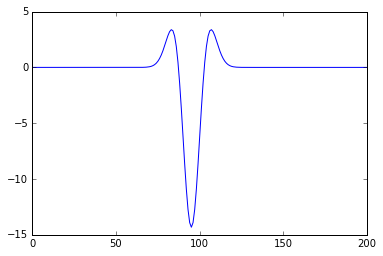

5


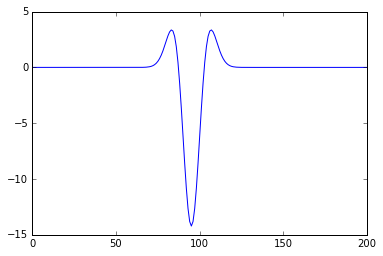

6


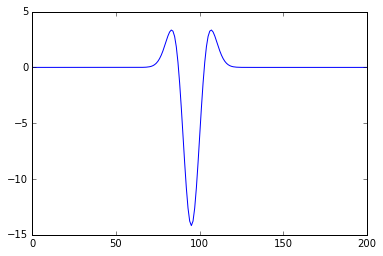

7


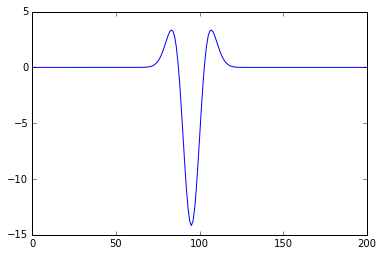

8


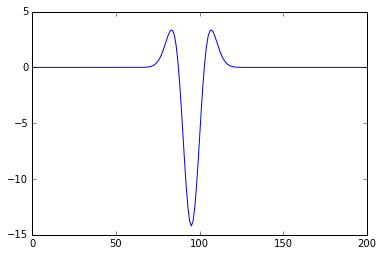

9


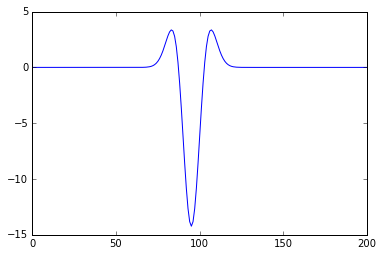

10


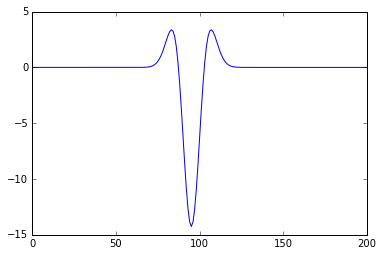

11


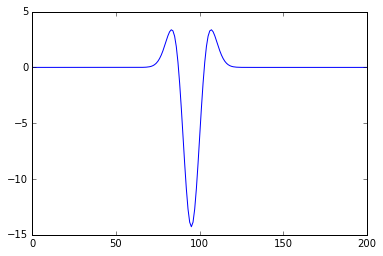

12


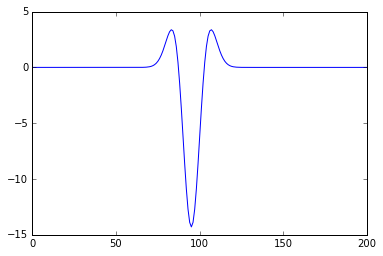

13


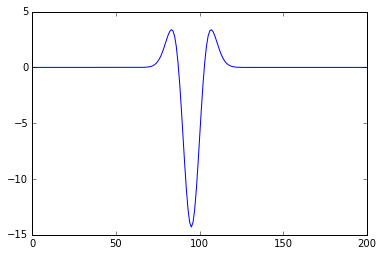

14


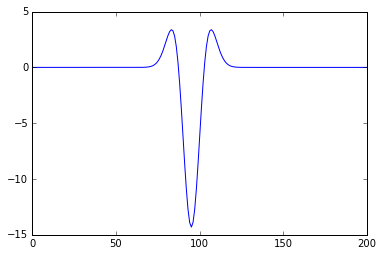

15


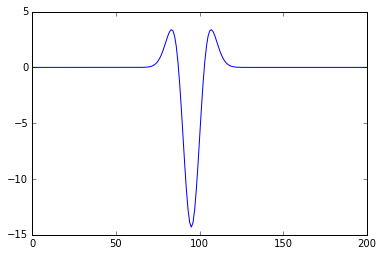

16


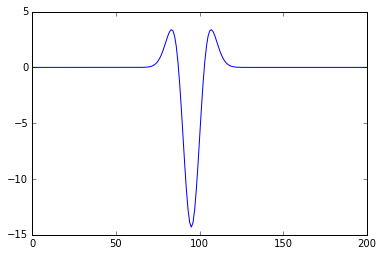

17


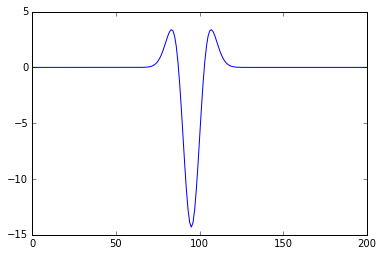

18


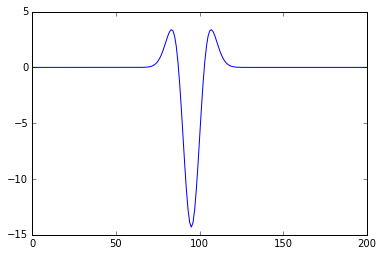

19


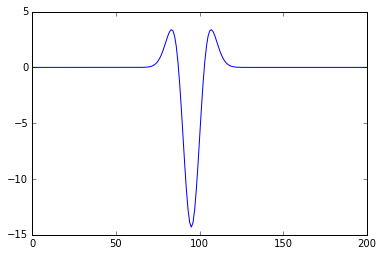

20


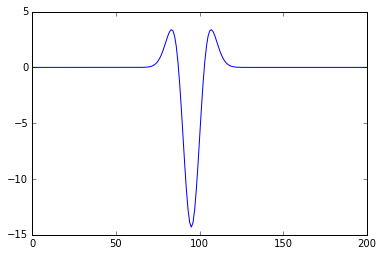

21


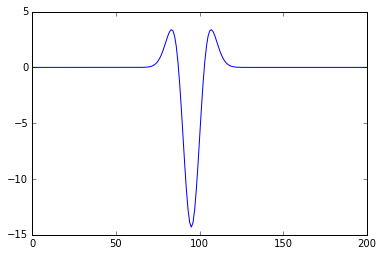

22


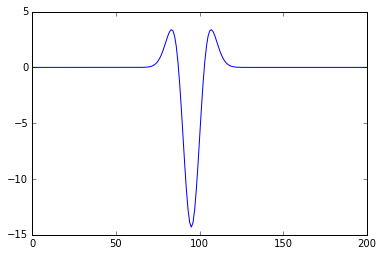

23


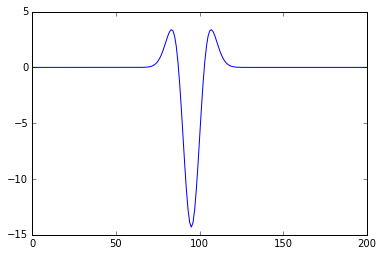

24


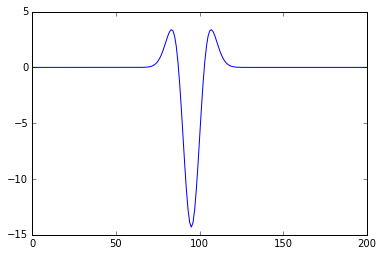

25


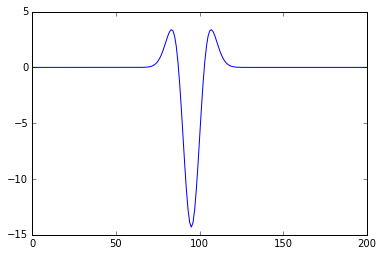

26


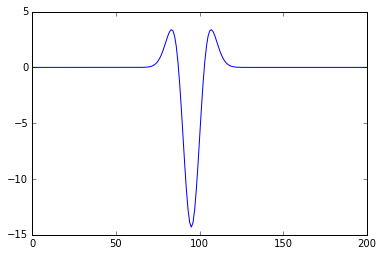

27


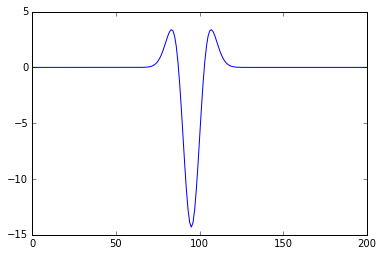

28


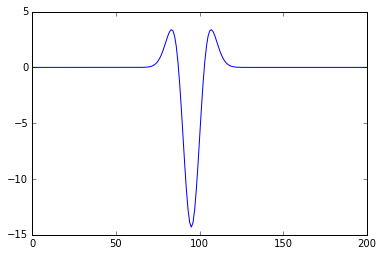

29


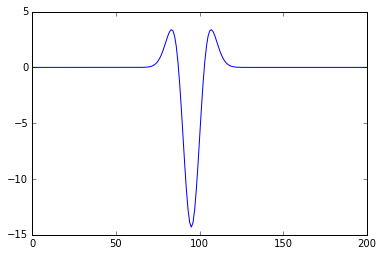

30


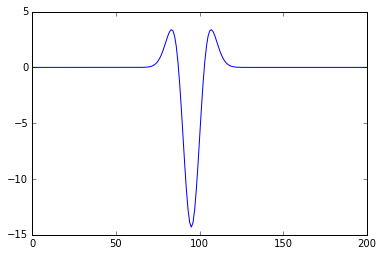

31


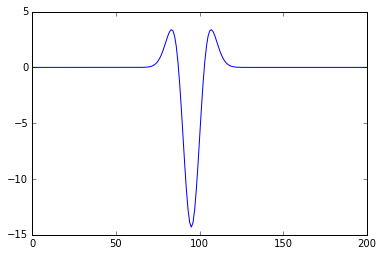

32


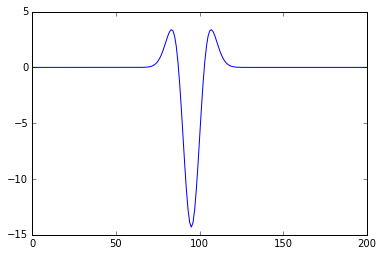

33


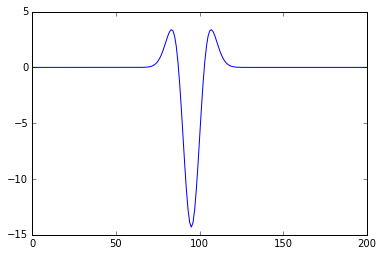

34


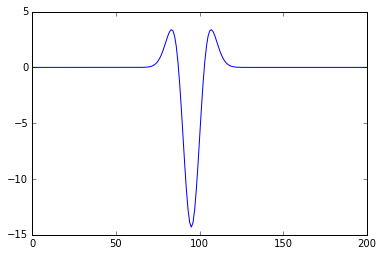

35


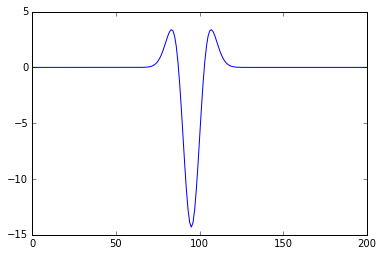

36


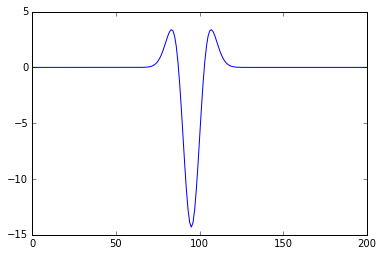

37


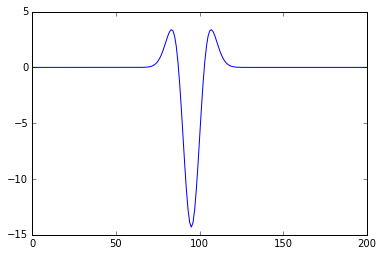

38


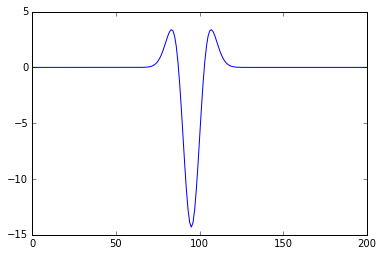

39


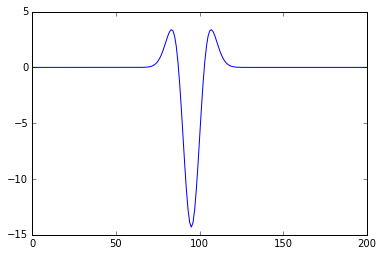

40


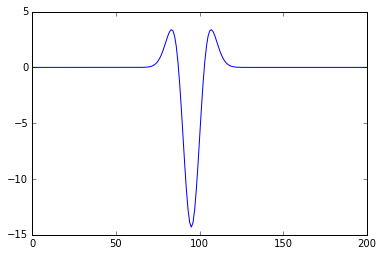

41


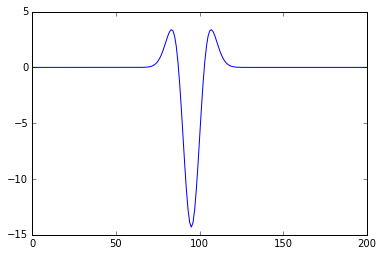

42


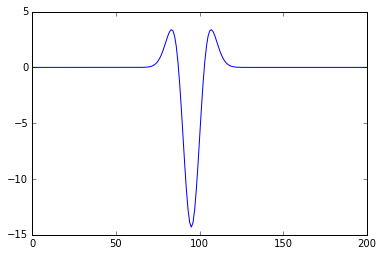

43


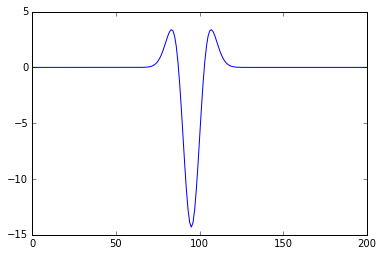

44


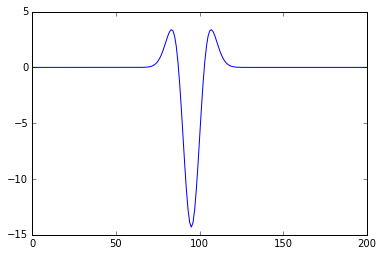

45


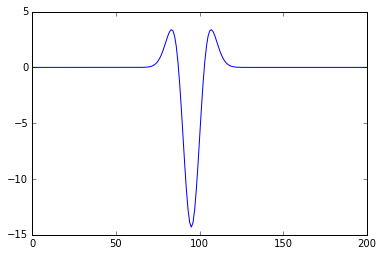

46


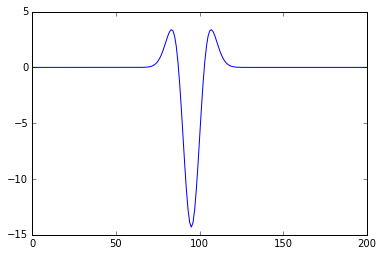

47


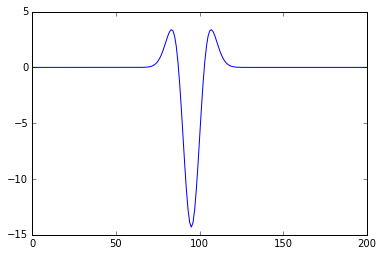

48


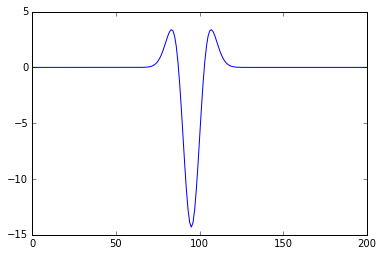

49


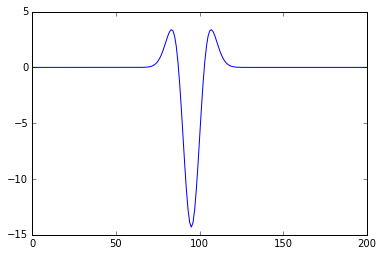

50


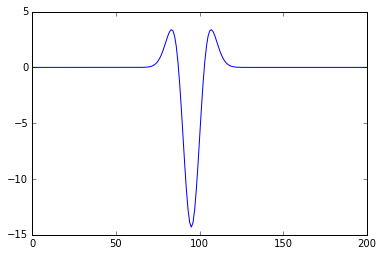

51


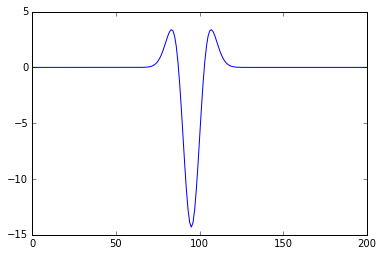

52


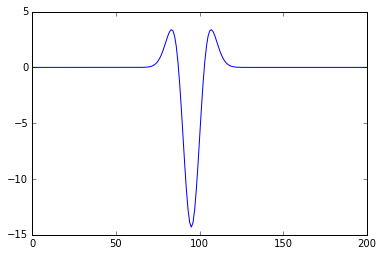

53


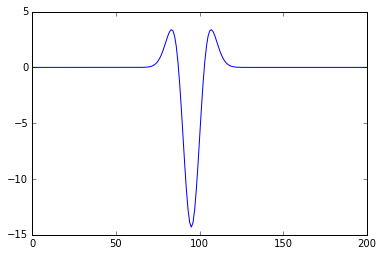

54


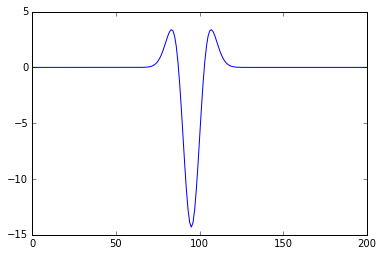

55


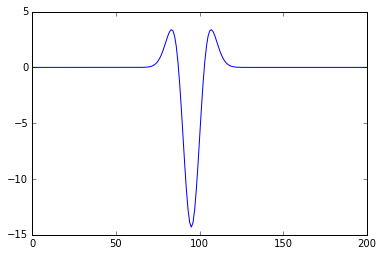

56


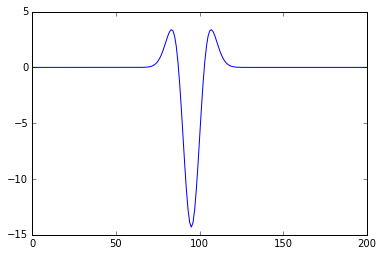

57


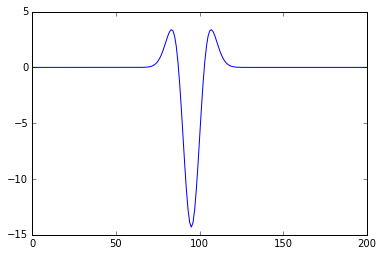

58


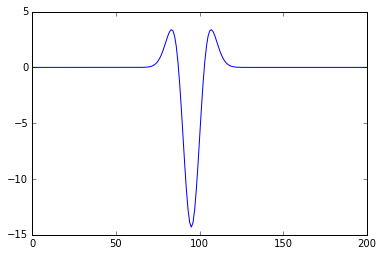

59


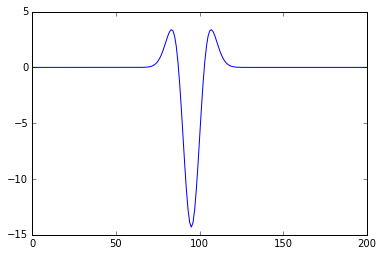

60


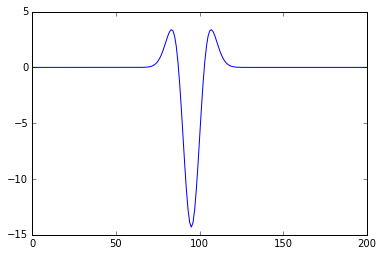

61


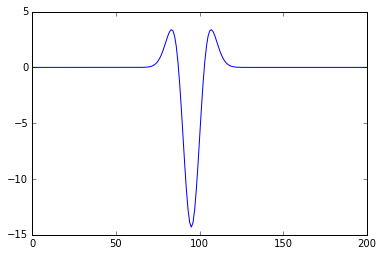

62


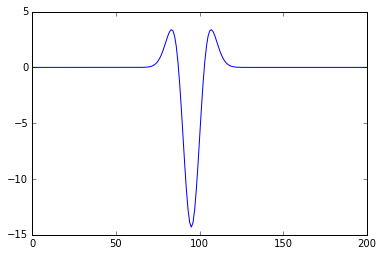

63


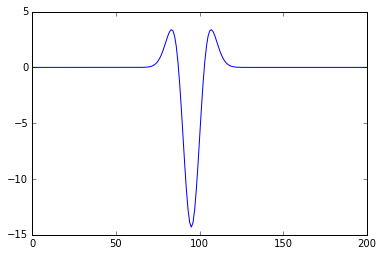

64


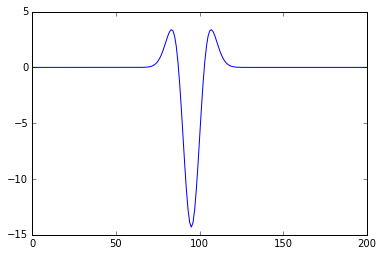

65


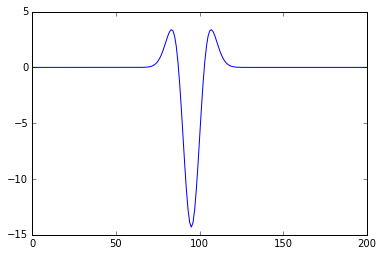

66


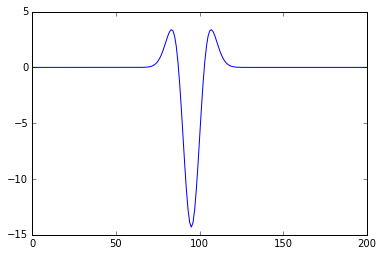

67


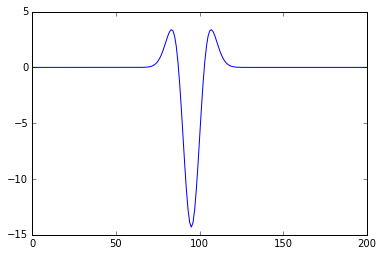

68


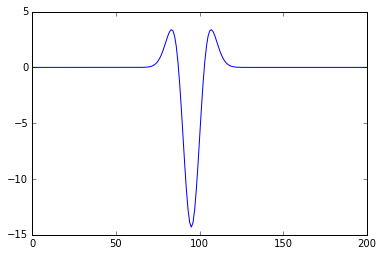

69


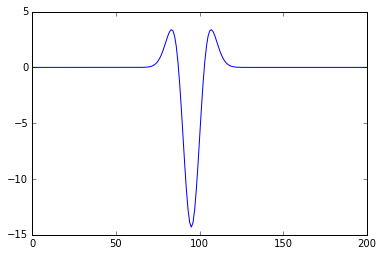

70


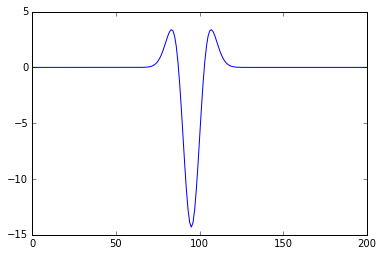

71


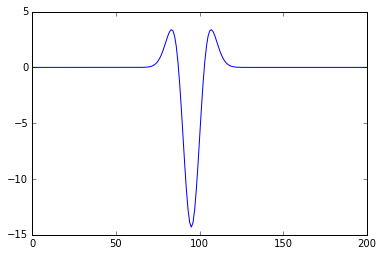

72


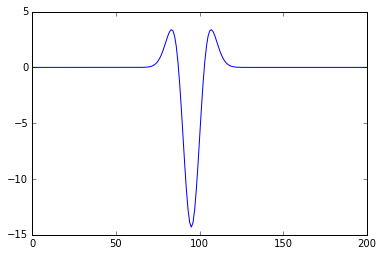

73


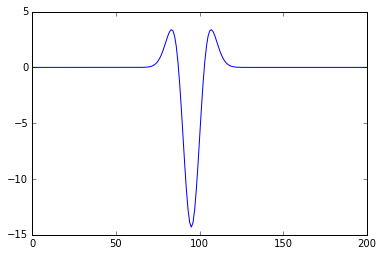

74


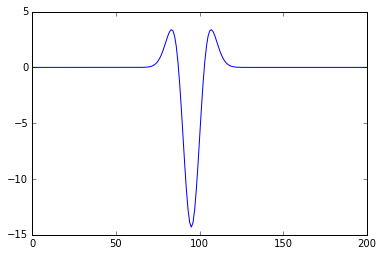

75


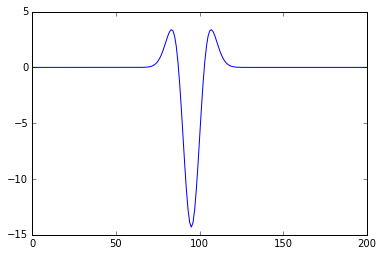

76


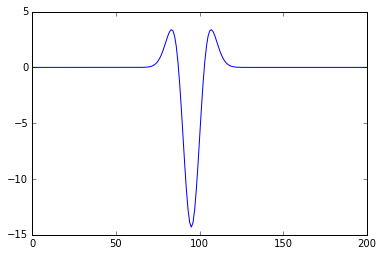

77


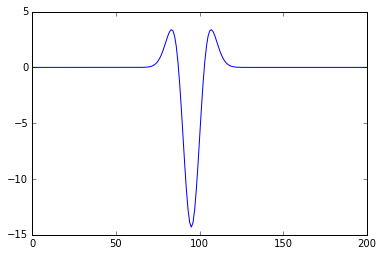

78


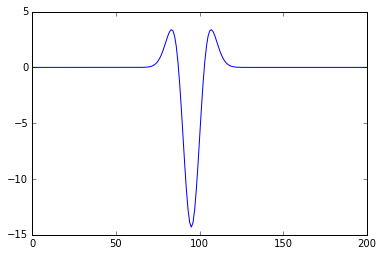

79


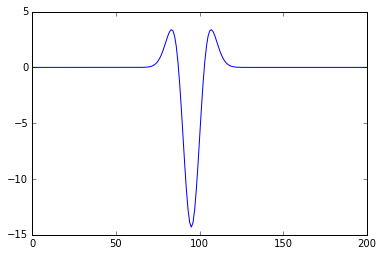

80


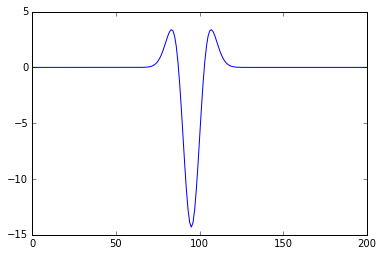

81


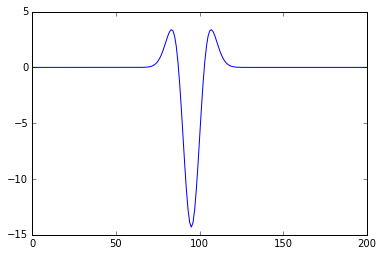

82


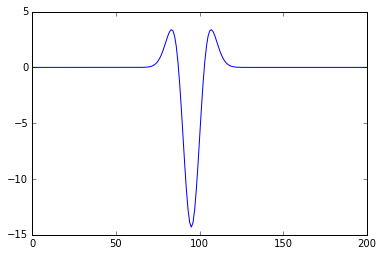

83


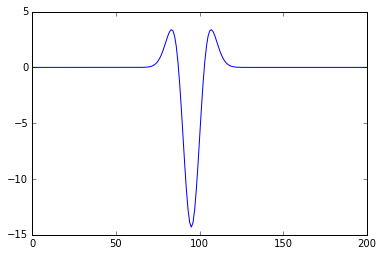

84


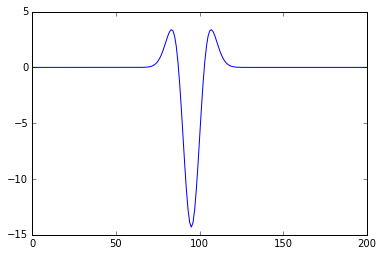

85


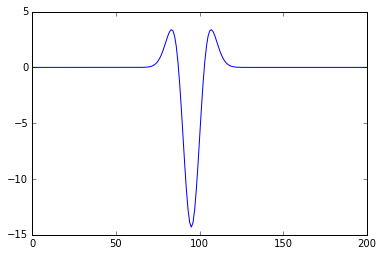

86


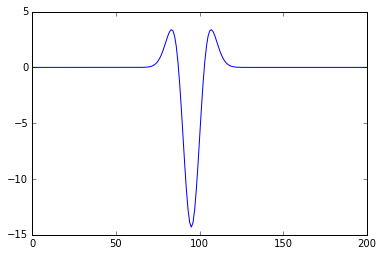

87


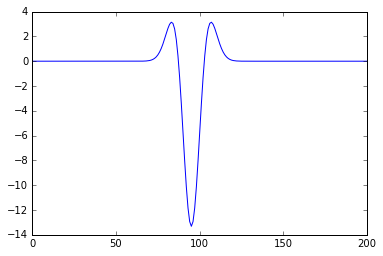

88


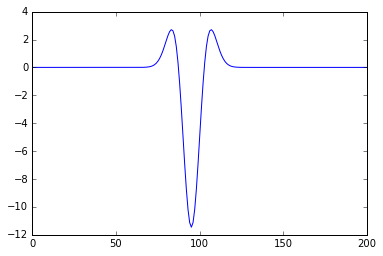

89


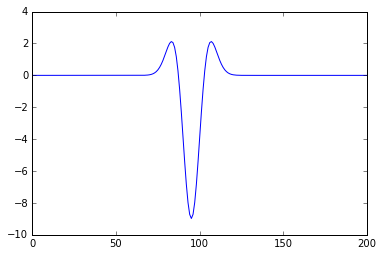

90


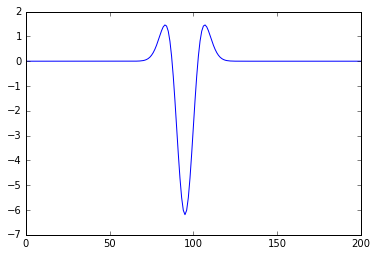

91


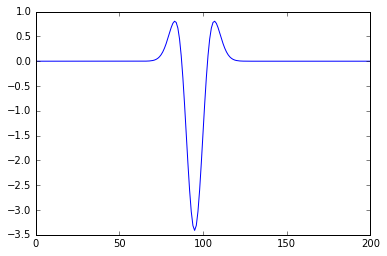

92


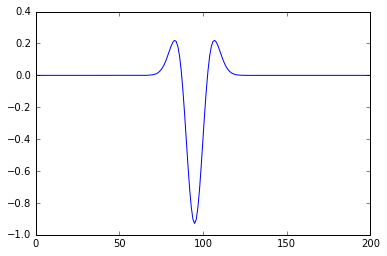

93


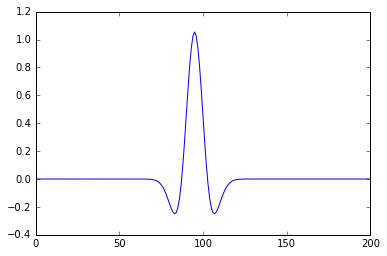

94


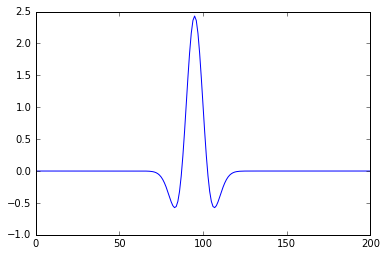

95


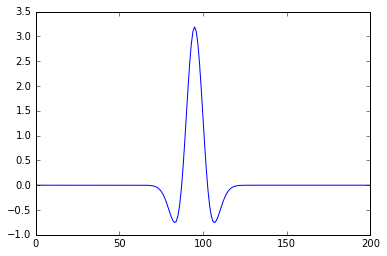

96


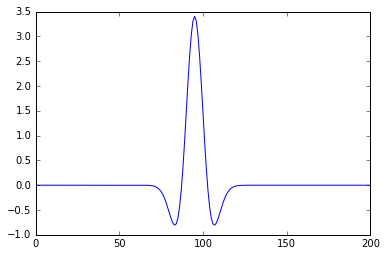

97


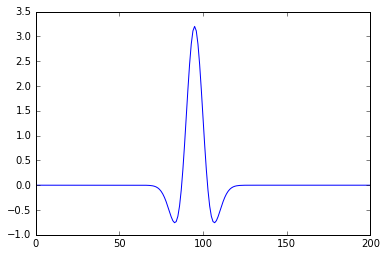

98


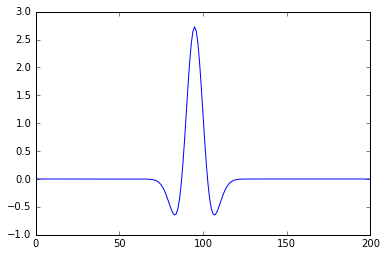

99


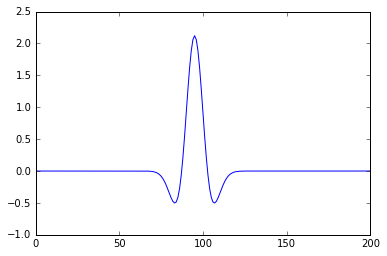

In [7]:
# definition for stimulation and filters parameters

a = 20/16.5
b = 0.3
c = 0.008


dt = 1.0
speed = 0.0
width = 1.0

x_ini = xmin+width # starts from the left margin
x_ini = 0.0

xnpts = 201 #i
nstep = 100 #j
ss = np.zeros((xnpts,nstep))
rn = np.zeros((xnpts,nstep))


#Checking biphasic response

for i in range(len(ft)):
    ft[i] = k_t(a,b,c,i)

ss_d=np.zeros((xnpts,nstep))

for j in range(xnpts):
    for i in range(nstep):
        ss_d[j,i]=s_d(x[j],i,width,speed,x_ini)
        
for j in range(nstep):
    #print(j)
    ssj = ss_d[:,j]
    rn[:,j] = np.convolve(ssj,fx,'same')
    #plt.plot(np.convolve(ss_d[:,j],fx,'same')) 
    #plt.show()
for i in range(xnpts):
    temp =rn[i,:]
    #plt.plot(temp)
    rn[i,:]=np.convolve(temp,ft,'same')
for j in range(nstep):
    print(j)
    plt.plot(rn[:,j])
    plt.show()

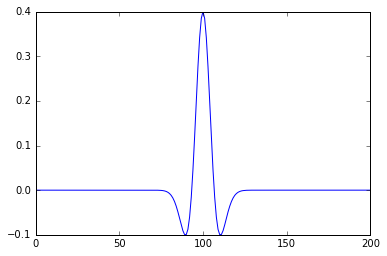

In [8]:
plt.plot(fx)


In [9]:
np.outer(fx,ft).shape

(201, 30)